# Notebook to open and view detections on audio:

## 1) Figuring out our imports:

### a) Below are the imports pertaining to accessing data and metadata

In [1]:
from pathlib import Path
import glob
import exiftool
import soundfile as sf

### b) Below are the imports pertaining to data manipulation

In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

### c) Below are the imports pertaining to data visualization

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import datetime as dt

### d) Below are the imports pertaining to the use of the MSDS pipeline

In [5]:
import sys

# append the path of the
# parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

import src.batdt2_pipeline as batdetect2_pipeline
import src.file_dealer as file_dealer
from cfg import get_config

In [8]:
def plot_audio_seg(audio_features, spec_features):
    audio_seg = audio_features['audio_seg']
    fs = audio_features['sample_rate']
    start = audio_features['start']
    duration = audio_features['duration']

    vmax = spec_features['vmax']
    vmin = spec_features['vmin']
    cmap = spec_features['cmap']
    nfft = spec_features['NFFT']

    plt.figure(figsize=(15, 5))
    plt.rcParams.update({'font.size': 24})
    plt.title(spec_features['plot_title'], fontsize=24)
    plt.specgram(audio_seg, NFFT=nfft, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.yticks(ticks=np.linspace(0, 1, 6), labels=np.linspace(0, fs/2000, 6).astype('int'))
    plot_xtype = 'float'
    if (duration > 60):
        plot_xtype = 'int'
    plt.xticks(ticks=np.linspace(0, duration*(fs/2), 11), 
               labels=np.round(np.linspace(start, start+duration, 11, dtype=plot_xtype), 2), rotation=30)
    plt.ylabel("Frequency (kHz)")
    plt.xlabel("Time (s)")
    plt.show()


def plot_dets_over_audio(audio_features, spec_features, plot_dets):
    audio_seg = audio_features['audio_seg']
    fs = audio_features['sample_rate']
    start = audio_features['start']
    duration = audio_features['duration']

    vmax = spec_features['vmax']
    vmin = spec_features['vmin']
    cmap = spec_features['cmap']
    nfft = spec_features['NFFT']

    plt.figure(figsize=(15, 5))
    plt.rcParams.update({'font.size': 24})
    plt.title(spec_features['plot_title'], fontsize=24)
    plt.specgram(audio_seg, NFFT=nfft, cmap=cmap, vmin=vmin, vmax=vmax)

    ax = plt.gca()
    for i, row in plot_dets.iterrows():
        rect = patches.Rectangle(((row['start_time'] - start)*(fs/2), row['low_freq']/(fs/2)), 
                        (row['end_time'] - row['start_time'])*(fs/2), (row['high_freq'] - row['low_freq'])/(fs/2), 
                        linewidth=1, edgecolor='yellow', facecolor='none', alpha=0.8)
        ax.add_patch(rect)

    plt.yticks(ticks=np.linspace(0, 1, 6), labels=np.linspace(0, fs/2000, 6).astype('int'))
    plot_xtype = 'float'
    if (duration > 60):
        plot_xtype = 'int'
    plt.xticks(ticks=np.linspace(0, duration*(fs/2), 11), 
               labels=np.round(np.linspace(start, start+duration, 11, dtype=plot_xtype), 2), rotation=30)
    plt.ylabel("Frequency (kHz)")
    plt.xlabel("Time (s)")
    plt.show()

In [38]:
df = pd.read_csv('../output_dir/recover-20231106/Foliage/bd2__recover-20231106_UBNA_011.csv')

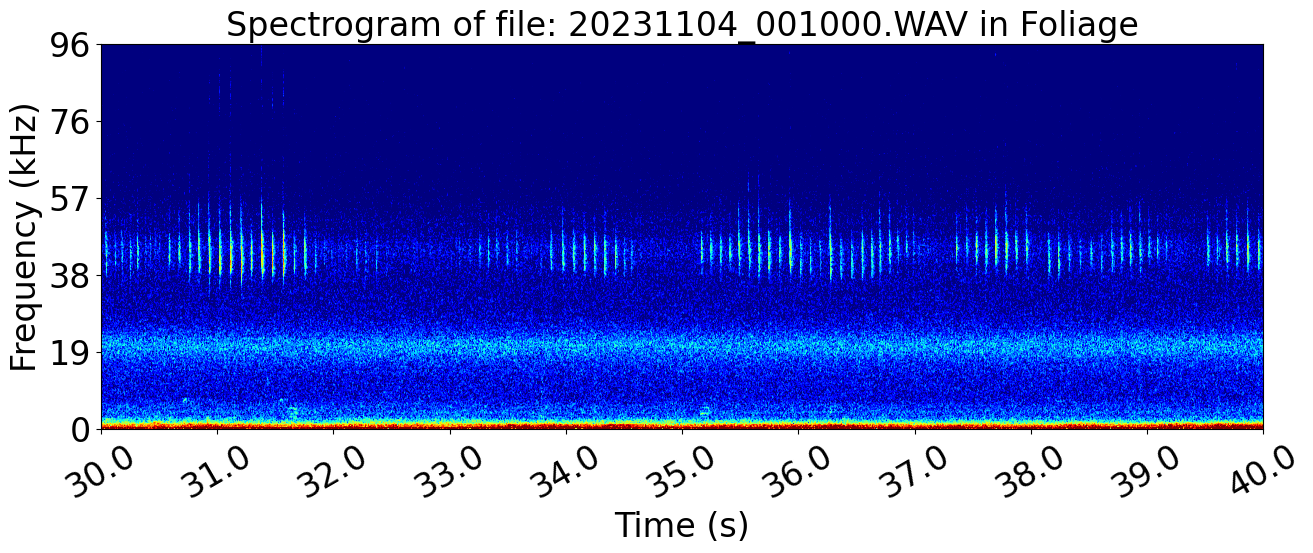

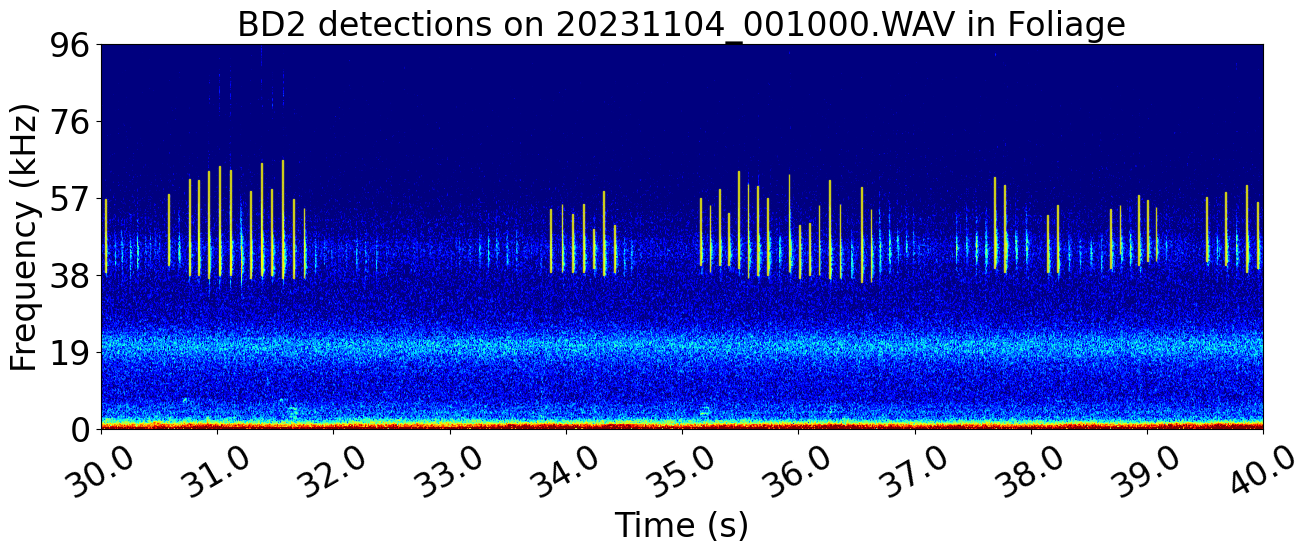

In [40]:
plot_file = Path('../../Downloads/20231104_001000.WAV')
plot_df = df.loc[pd.to_datetime(df['input_file'], format='%Y%m%d_%H%M%S', exact=False) == dt.datetime.strptime(plot_file.name, '%Y%m%d_%H%M%S.WAV')]
audio_file = sf.SoundFile(plot_file)
fs = audio_file.samplerate
start = 30
duration = 10
audio_file.seek(int(fs*start))
audio_seg = audio_file.read(int(fs*duration))
vmin = 20*np.log10(np.max(audio_seg)) - 40 # hide anything below -rm_dB dB
vmax = 20*np.log10(np.max(audio_seg)) + 0
audio_features = dict()
audio_features['file_path'] = Path(plot_file)
audio_features['audio_seg'] = audio_seg
audio_features['sample_rate'] = fs
audio_features['start'] = start
audio_features['duration'] = duration

spec_features = dict()
spec_features['NFFT'] = 1024
spec_features['cmap'] = 'jet'
spec_features['vmin'] = vmin
spec_features['vmax'] = vmax

spec_features['plot_title'] = f"Spectrogram of file: {audio_features['file_path'].name} in Foliage"
plot_audio_seg(audio_features, spec_features)
spec_features['plot_title'] = f"BD2 detections on {audio_features['file_path'].name} in Foliage"
plot_dets_over_audio(audio_features, spec_features, plot_df)

In [28]:
df = pd.read_csv('../output_dir/recover-20231106/Telephone Field/bd2__recover-20231106_UBNA_001.csv')

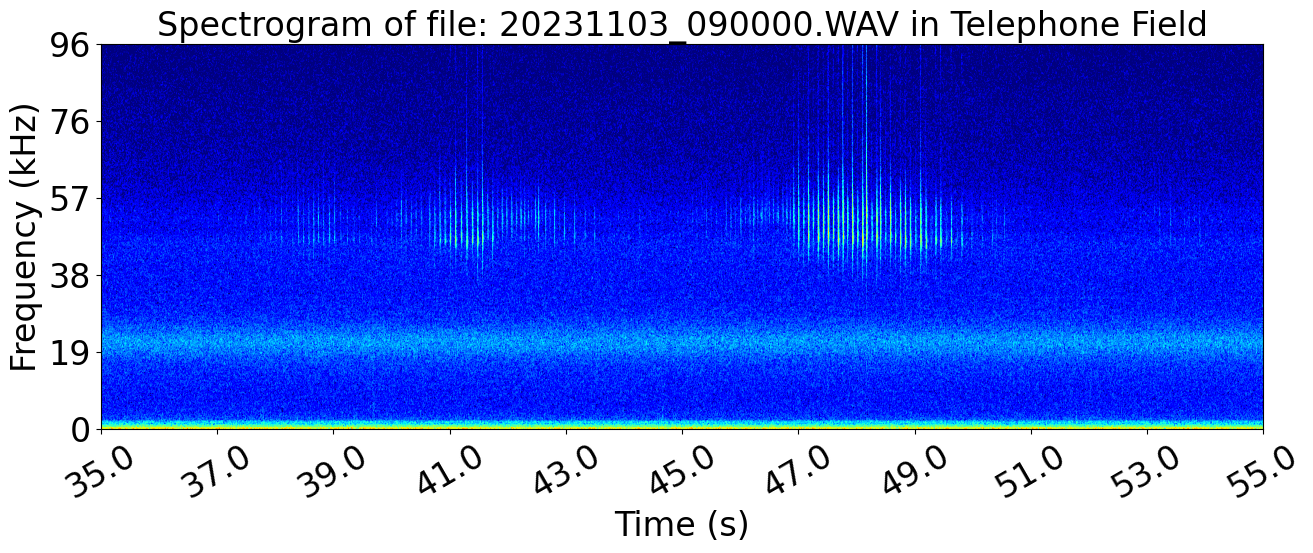

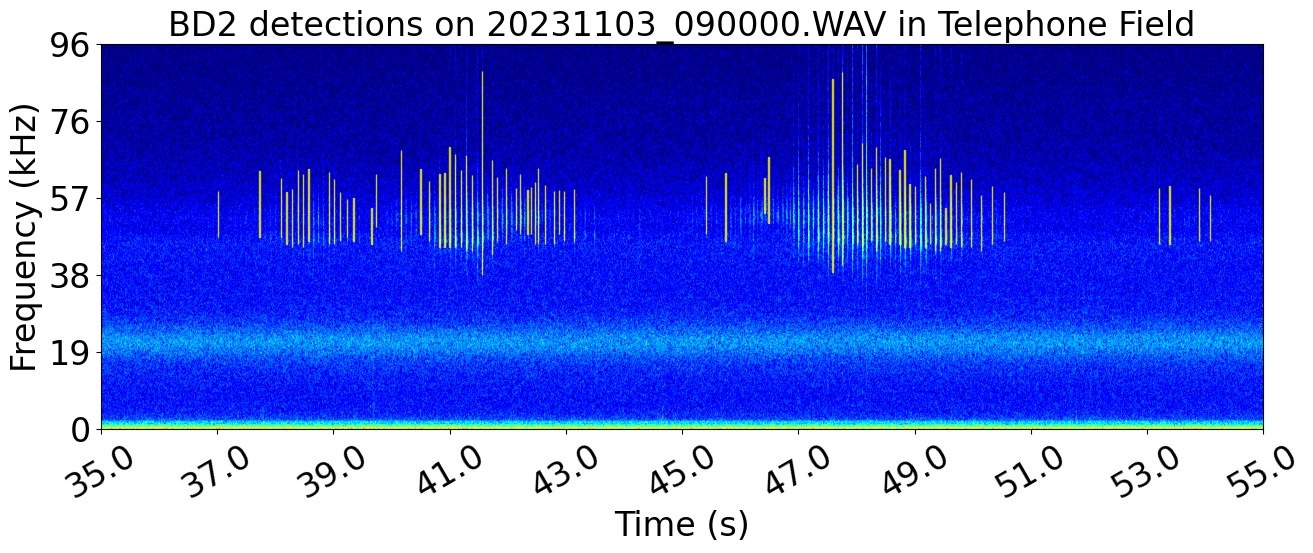

In [36]:
plot_file = Path('../../Downloads/20231103_090000.WAV')
plot_df = df.loc[pd.to_datetime(df['input_file'], format='%Y%m%d_%H%M%S', exact=False) == dt.datetime.strptime(plot_file.name, '%Y%m%d_%H%M%S.WAV')]
audio_file = sf.SoundFile(plot_file)
fs = audio_file.samplerate
start = 35
duration = 20
audio_file.seek(int(fs*start))
audio_seg = audio_file.read(int(fs*duration))
vmin = 20*np.log10(np.max(audio_seg)) - 60 # hide anything below -rm_dB dB
vmax = 20*np.log10(np.max(audio_seg)) + 0
audio_features = dict()
audio_features['file_path'] = Path(plot_file)
audio_features['audio_seg'] = audio_seg
audio_features['sample_rate'] = fs
audio_features['start'] = start
audio_features['duration'] = duration

spec_features = dict()
spec_features['NFFT'] = 1024
spec_features['cmap'] = 'jet'
spec_features['vmin'] = vmin
spec_features['vmax'] = vmax

spec_features['plot_title'] = f"Spectrogram of file: {audio_features['file_path'].name} in Telephone Field"
plot_audio_seg(audio_features, spec_features)
spec_features['plot_title'] = f"BD2 detections on {audio_features['file_path'].name} in Telephone Field"
plot_dets_over_audio(audio_features, spec_features, plot_df)

In [18]:
input_file = Path('/Volumes/Elements/recover-20220815/central_pond/20220813_070000.WAV')

cfg = get_config()
cfg['input_audio'] = input_file
cfg['tmp_dir'] = Path('../output')
cfg['output_dir'] = Path('../output_dir')
cfg['run_model'] = True
cfg['should_csv'] = False
cfg['save'] = True

batdetect2_pipeline.run_pipeline_on_file(input_file, cfg)

100%|██████████| 60/60 [08:13<00:00,  8.22s/it]


start_time   end_time  low_freq  high_freq                  class  \
0       3.0445     3.0595   23750.0    28084.0      Nyctalus leisleri   
1      14.8625    14.8741   23750.0    30718.0    Eptesicus serotinus   
2      16.5085    16.5220   23750.0    29404.0      Nyctalus leisleri   
3      16.9985    17.0102   23750.0    30844.0    Eptesicus serotinus   
4      17.5375    17.5501   22890.0    29133.0      Nyctalus leisleri   
..         ...        ...       ...        ...                    ...   
0    1793.8505  1793.8604   40937.0    49374.0  Pipistrellus nathusii   
1    1794.2215  1794.2296   40937.0    50497.0  Pipistrellus nathusii   
2    1794.4015  1794.4110   40078.0    51029.0  Pipistrellus nathusii   
3    1794.6825  1794.6913   40937.0    51857.0  Pipistrellus nathusii   
4    1794.9515  1794.9598   40078.0    52981.0  Pipistrellus nathusii   

    class_prob  det_prob individual         event  \
0        0.450     0.581         -1  Echolocation   
1        0.277     0.631         -1  Echolocation   
2        0.344     0.609         -1  Echolocation   
3        0.277     0.583         -1  Echolocation   
4        0.269     0.644         -1  Echolocation   
..         ...       ...        ...           ...   
0        0.430     0.507         -1  Echolocation   
1        0.484     0.550         -1  Echolocation   
2        0.444     0.577         -1  Echolocation   
3        0.479     0.559         -1  Echolocation   
4        0.433     0.520         -1  Echolocation   

                                           input_file  
0   /Volumes/Elements/recover-20220815/central_pon...  
1   /Volumes/Elements/recover-20220815/central_pon...  
2   /Volumes/Elements/recover-20220815/central_pon...  
3   /Volumes/Elements/recover-20220815/central_pon...  
4   /Volumes/Elements/recover-20220815/central_pon...  
..                                                ...  
0   /Volumes/Elements/recover-20220815/central_pon...  
1   /Volumes/Elements/recover-20220815/central_pon...  
2   /Volumes/Elements/recover-20220815/central_pon...  
3   /Volumes/Elements/recover-20220815/central_pon...  
4   /Volumes/Elements/recover-20220815/central_pon...  

[1201 rows x 10 columns]

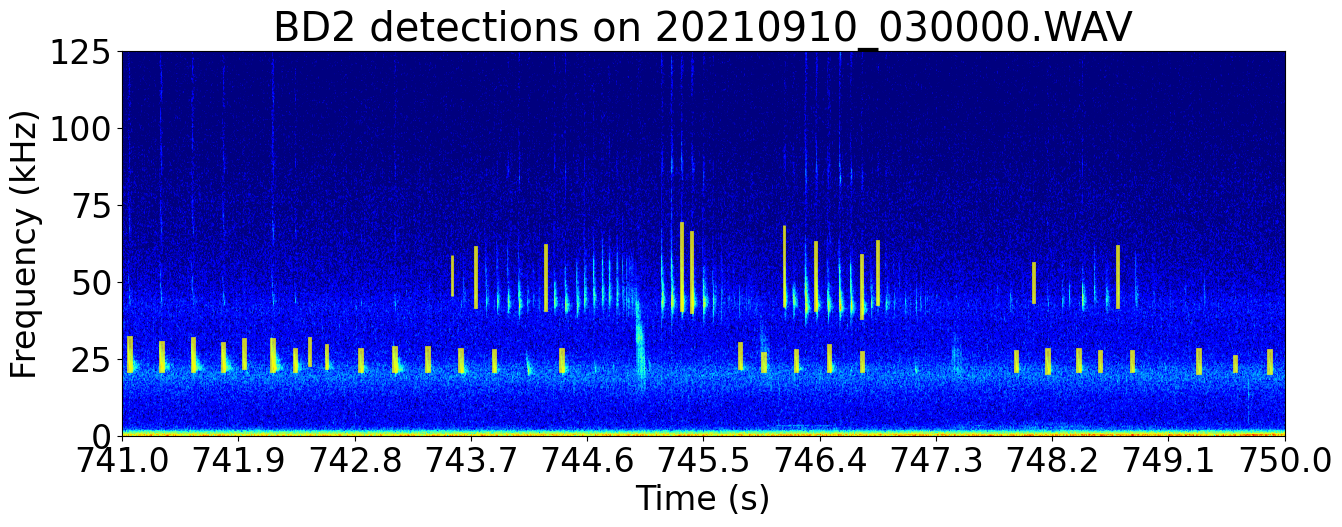

100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


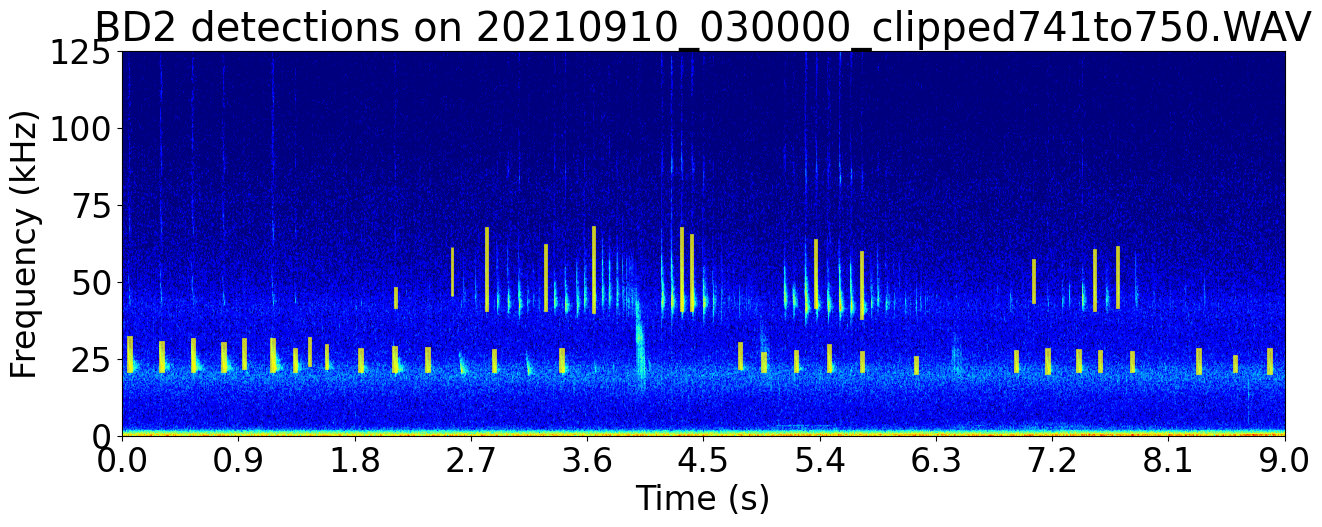

In [13]:
input_file = Path('../../Documents/Research/Lab_related/example/original_recording/recover-20210912_unit2/UBNA_002/20210910_030000.WAV')

cfg = get_config()
cfg['input_audio'] = Path(input_file)
cfg['tmp_dir'] = Path('../output')
cfg['output_dir'] = Path('../output_dir')
cfg['run_model'] = True
cfg['should_csv'] = True
cfg['save'] = True

filename = input_file.name.split('.')[0]
original_file_dets = pd.read_csv(f'../output_dir/batdetect2_pipeline_{filename}.csv')

audio_file = sf.SoundFile(input_file)
fs = audio_file.samplerate
start = 741
duration = 9
end = int(start+duration)
audio_file.seek(int(fs*start))
audio_seg = audio_file.read(int(fs*duration))
vmin = 20*np.log10(np.max(audio_seg)) - 50 # hide anything below -rm_dB dB
write_file = f'../../Downloads/{filename}_clipped{start}to{end}.WAV'

audio_features = dict()
audio_features['file_path'] = input_file
audio_features['audio_seg'] = audio_seg
audio_features['sample_rate'] = fs
audio_features['start'] = start
audio_features['duration'] = duration

spec_features = dict()
spec_features['NFFT'] = 1024
spec_features['cmap'] = 'jet'
spec_features['vmin'] = vmin

window_cond = np.logical_and(original_file_dets['start_time'] > start, original_file_dets['end_time'] < (start+duration))
original_plot_dets = original_file_dets.loc[window_cond]
plot_dets_over_audio(audio_features, spec_features, original_plot_dets)
sf.write(write_file, audio_seg, fs)

input_file = Path(write_file)

cfg = get_config()
cfg['input_audio'] = input_file
cfg['tmp_dir'] = Path('../output')
cfg['output_dir'] = Path('../output_dir')
cfg['run_model'] = True
cfg['should_csv'] = True
cfg['save'] = True

clipped_file_dets = batdetect2_pipeline.run_pipeline_on_file(input_file, cfg)

audio_file = sf.SoundFile(input_file)
fs = audio_file.samplerate
start = 0
audio_seg = audio_file.read()

audio_features = dict()
audio_features['file_path'] = input_file
audio_features['audio_seg'] = audio_seg
audio_features['sample_rate'] = fs
audio_features['start'] = start
audio_features['duration'] = duration

spec_features = dict()
spec_features['NFFT'] = 1024
spec_features['cmap'] = 'jet'
spec_features['vmin'] = vmin

window_cond = np.logical_and(clipped_file_dets['start_time'] > start, clipped_file_dets['end_time'] < (start+duration))
clipped_plot_dets = clipped_file_dets.loc[window_cond]
plot_dets_over_audio(audio_features, spec_features, clipped_plot_dets)

clipped_plot_dets['start_time'] = 646+clipped_plot_dets['start_time']
clipped_plot_dets['end_time'] = 646+clipped_plot_dets['end_time']